In [34]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard
from tensorflow.keras import backend as K
import os
import datetime
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [35]:
img = image.load_img("base_data/thread error/337_patch2-5.png")

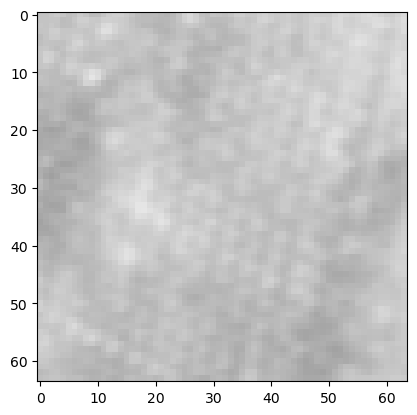

In [20]:
plt.imshow(img)

In [22]:
cv2.imread("base_data/thread error/337_patch2-5.png").shape

(64, 64, 3)

In [23]:
# Clear session
K.clear_session()

# Reset TensorFlow
tf.compat.v1.reset_default_graph()

In [28]:
# Directory paths
base_dir = "base_data"

# Image data generator
datagen = ImageDataGenerator(
    rescale=1.0/255,
    shear_range=0.2,
    zoom_range=0.2,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2 
)

Displaying images from folder: base_data/good


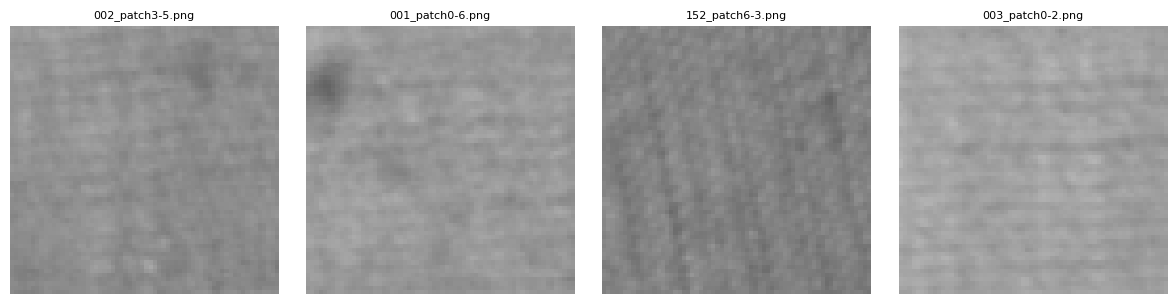

Displaying images from folder: base_data/hole


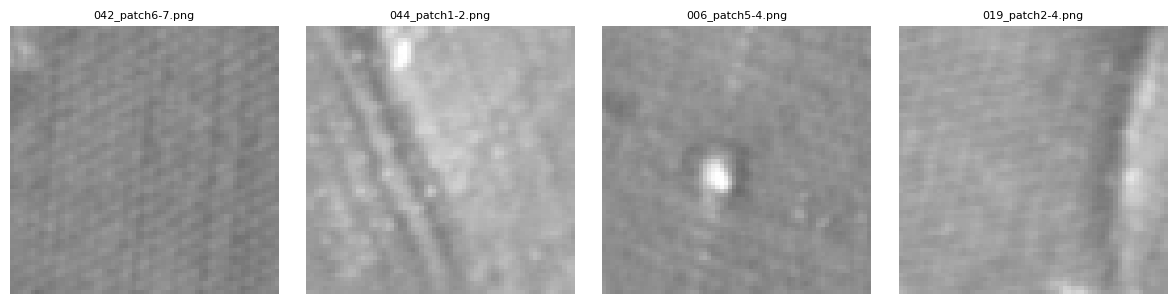

Displaying images from folder: base_data/objects


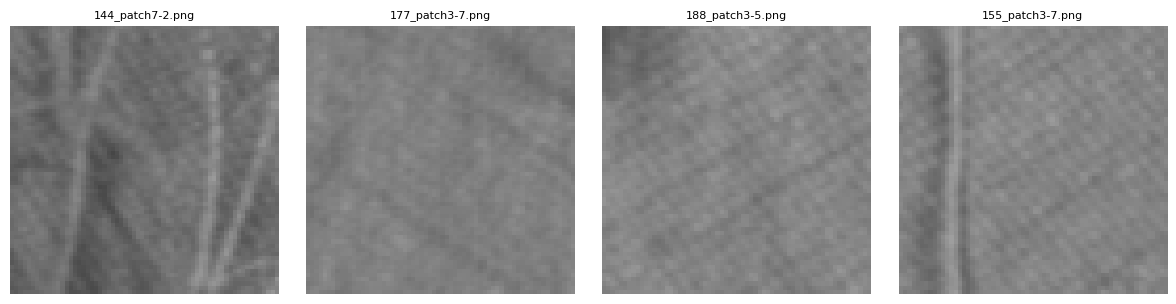

Displaying images from folder: base_data/oil spot


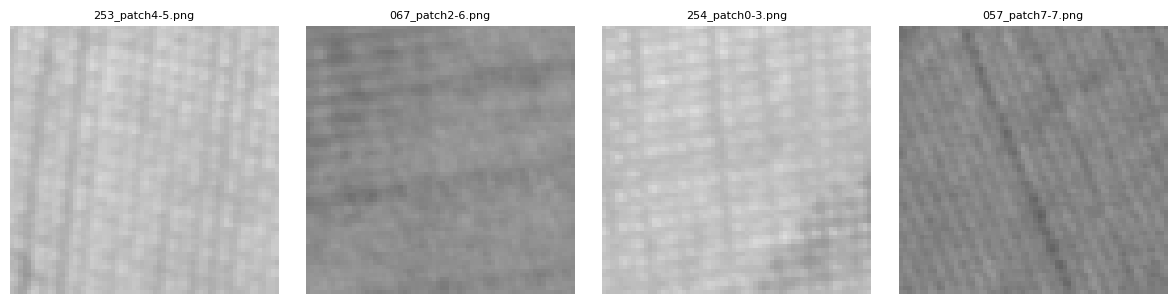

Displaying images from folder: base_data/thread error


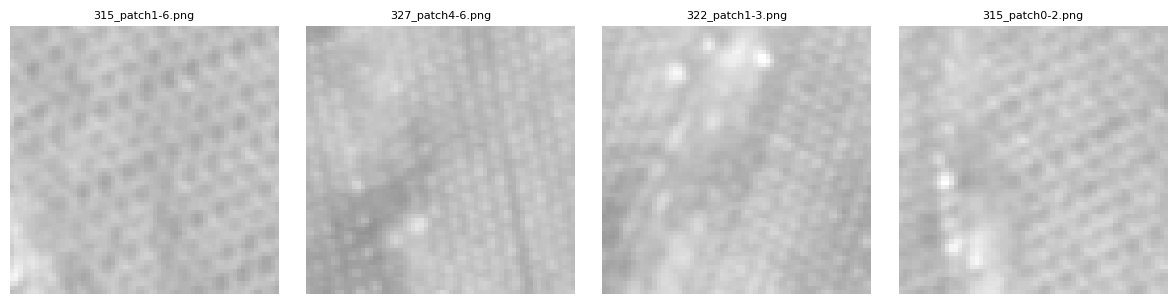

In [29]:
import os
import random
import matplotlib.pyplot as plt

def display_random_images(folder_path, num_images=4, rows=1, cols=4):
    try:
        image_files = os.listdir(folder_path)
        if len(image_files) == 0:
            print(f"No images found in the folder: {folder_path}")
            return
        
        random_images = random.sample(image_files, min(num_images, len(image_files)))

        plt.figure(figsize=(cols * 3, rows * 3))
        for i, image_file in enumerate(random_images):
            image_path = os.path.join(folder_path, image_file)
            image = plt.imread(image_path)

            plt.subplot(rows, cols, i + 1)
            plt.imshow(image)
            plt.title(image_file, fontsize=8)
            plt.axis('off')

        plt.tight_layout()
        plt.show()
    except Exception as e:
        print(f"An error occurred: {e}")

folders = [
    'base_data/good', 
    'base_data/hole', 
    'base_data/objects', 
    'base_data/oil spot', 
    "base_data/thread error"
]

for folder in folders:
    print(f"Displaying images from folder: {folder}")
    display_random_images(folder)

In [30]:
train_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# Calculate steps per epoch
steps_per_epoch = train_generator.samples // train_generator.batch_size
validation_steps = validation_generator.samples // validation_generator.batch_size

Found 1870 images belonging to 5 classes.
Found 467 images belonging to 5 classes.


In [31]:
# CNN model
model = Sequential([
    Input(shape=(150, 150, 3)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(5, activation='softmax')
])
    
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      18,940,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │           2,565 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,036,229 (72.62 MB)

 Trainable params: 19,036,229 (72.62 MB)

 Non-trainable params: 0 (0.00 B)

In [32]:
tf.config.optimizer.set_jit(True) 

In [33]:
# Early stopping and learning rate reduction callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

# Model training
history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    validation_data=validation_generator,
    validation_steps=validation_steps,
    epochs=50,
    callbacks=[early_stopping, reduce_lr]
)

model.save('cnn_model.h5')

Epoch 1/50


C:\Users\VarshaBuchaiahgari\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


58/58 ━━━━━━━━━━━━━━━━━━━━ 65s 1s/step - accuracy: 0.2021 - loss: 1.7637 - val_accuracy: 0.2121 - val_loss: 1.6064 - learning_rate: 0.0010
Epoch 2/50
 1/58 ━━━━━━━━━━━━━━━━━━━━ 25s 439ms/step - accuracy: 0.3438 - loss: 1.6026

C:\Users\VarshaBuchaiahgari\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.3438 - loss: 1.6026 - val_accuracy: 0.2632 - val_loss: 1.6029 - learning_rate: 0.0010
Epoch 3/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 37s 613ms/step - accuracy: 0.2254 - loss: 1.6076 - val_accuracy: 0.2121 - val_loss: 1.6030 - learning_rate: 0.0010
Epoch 4/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1875 - loss: 1.6003 - val_accuracy: 0.2632 - val_loss: 1.5777 - learning_rate: 0.0010
Epoch 5/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 38s 623ms/step - accuracy: 0.2129 - loss: 1.6044 - val_accuracy: 0.2143 - val_loss: 1.6091 - learning_rate: 0.0010
Epoch 6/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1875 - loss: 1.6104 - val_accuracy: 0.2105 - val_loss: 1.6393 - learning_rate: 0.0010
Epoch 7/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 38s 624ms/step - accuracy: 0.2044 - loss: 1.6096 - val_accuracy: 0.2165 - val_loss: 1.5990 - learning_rate: 0.0010
Epoch 8/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2188 - loss: 1.6191 - val_accuracy: 0.

In [120]:
test_generator = ImageDataGenerator(rescale=1.0/255).flow_from_directory(
    base_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)
print(f'Test accuracy: {test_acc:.2f}')

Found 25600 images belonging to 5 classes.
800/800 ━━━━━━━━━━━━━━━━━━━━ 1343s 2s/step - accuracy: 0.9036 - loss: 0.4535
Test accuracy: 0.91
